In [36]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.lines as mlines
%matplotlib inline
import numpy as np
import os
import palettable
import pandas as pd
from scipy.stats import pearsonr, ttest_rel
import seaborn as sns
sns.set_context("poster", font_scale=1)
sns.set_style('white')
from statsmodels.formula.api import ols
import string

# Figures for: Neuroscientific insights into the development of analogical reasoning

Kirstie J. Whitaker\*, Michael S. Vendetti\*, Carter Wendelken & Silvia A. Bunge

## Figure 1

**a**. Analogy Task. Participants indicated which of the four choices was associated with an item in analogous fashion to the relation shared between the top two items. In this example, the refrigerator is associated with the milk carton (i.e., refrigerator stores the milk carton) in an analogous way to the dress and the closet items. On each trial, a semantic lure (e.g., cow), a perceptual lure (e.g., clock), and an unrelated lure (e.g., tennis racket) were included. Thus, participants’ correct choice was based on understanding the correct semantic association and disregarding irrelevant semantic or perceptual information. **b**. Semantic matching task. Participants decide which of the four choices share a semantic relationship with a target object. In this example, the pen is used to write on the notepad, and thus is the item with the strongest semantic association. On each semantic trial, a perceptual lure (e.g., a shower curtain) as well as two unrelated lures were included. Thus, participants had to understand that the correct choice was based on semantic, rather than just perceptual, associations.

In [37]:
analogy_stimulus_file = '../EXAMPLE_STIMULI/clothesclosetmilkfridge_whitebg.jpg'
semantic_stimulus_file = '../EXAMPLE_STIMULI/notebookpen_whitebg.jpg'

In [38]:
# Define the colors we're going to use
color_list = palettable.colorbrewer.get_map('Set1', 'qualitative', 5).mpl_colors

# Define the colour dictionary to make it easy to index these colors :)
color_dict = {}
color_dict['red'] = color_list[0]
color_dict['blue'] = color_list[1]
color_dict['green'] = color_list[2]
color_dict['purple'] = color_list[3]
color_dict['orange'] = color_list[4]

In [39]:
def make_figure1(analogy_stimulus_file, semantic_stimulus_file):
    
    fig, ax_list = plt.subplots(1, 2, figsize=(9,4.5))

    # Put the example analogy stimulus on the left
    ax = ax_list[0]
    img_ana = read_in_analogy(analogy_stimulus_file)
    ax.imshow(img_ana)

    # Add the coloured boxes & text
    ax = add_boxes_analogy(ax, color_dict)

    # Put the example semantic stimulus on the right
    ax = ax_list[1]
    img_sem = read_in_semantic(semantic_stimulus_file)
    ax.imshow(img_sem)

    # Add the coloured boxes & text
    ax = add_boxes_semantic(ax, color_dict)

    # Add in panel labels
    ax_list = add_panel_labels_fig1(ax_list)

    # Turn off both of the axes
    for ax in ax_list:
        ax.set_axis_off()

    # Tighten up the layout
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                        wspace=0, hspace=0)

    fig.savefig('../FIGURES/Figure1.png', dpi=600, bbox_inches=0)
    

In [40]:
def read_in_analogy(analogy_stimulus_file):
    
    img = mpimg.imread(analogy_stimulus_file)
    
    img = img[80:-5, 135:-165, :]

    return img

In [41]:
def read_in_semantic(semantic_stimulus_file):
    
    img = mpimg.imread(semantic_stimulus_file)
    
    img = img[18:-55, 120:-140, :]
    
    return img

In [11]:
def add_boxes_analogy(ax, color_dict):

    color_list = [ 'orange', 'purple', 'green', 'blue' ]
    
    text_list = [ 'semantic\nlure', 'perceptual\nlure', 'unrelated\nlure', 'correct\nchoice']
    
    for i, (color, text) in enumerate(zip(color_list, text_list)):
        
        # Add the coloured boxes
        ax.add_patch(
            patches.Rectangle(
                (40 + i*154, 430),
                150,
                150,
                fill=False,
                edgecolor=color_dict[color],
                linewidth=3
            )
        )

        # Add the text
        ax.text(
            116 + i*154,
            623,
            text,
            fontsize=15,
            color=color_dict[color],
            horizontalalignment='center',
            verticalalignment='center',
            fontname='arial'
        )

    return ax

In [12]:
def add_boxes_semantic(ax, color_dict):

    color_list = [ 'red', 'green', 'green', 'purple' ]
    
    text_list = [ 'correct\nchoice', 'unrelated\nlure', 'unrelated\nlure', 'perceptual\nlure']

    for i, (color, text) in enumerate(zip(color_list, text_list)):
        
        # Add the coloured boxes
        ax.add_patch(
            patches.Rectangle(
                (51 + i*163, 455),
                160,
                160,
                fill=False,
                edgecolor=color_dict[color],
                linewidth=3
            )
        )
        
        # Add the text
        ax.text(
            131 + i*163,
            660,
            text,
            fontsize=15,
            color=color_dict[color],
            horizontalalignment='center',
            verticalalignment='center',
            fontname='arial'
        )
        
    return ax

In [13]:
def add_panel_labels_fig1(ax_list):
    
    coords = (0.05, 0.95)
    color='w'
    fontsize=14
    
    letters = string.ascii_lowercase
    for i, ax in enumerate(ax_list):
        
        ax.text(coords[0], coords[1], 
                '({})'.format(letters[i]), 
                fontsize=fontsize, 
                transform=ax.transAxes, 
                color=color,
                horizontalalignment='center',
                verticalalignment='center',
                fontname='arial',
                fontweight='bold'
        )
        
    return ax_list

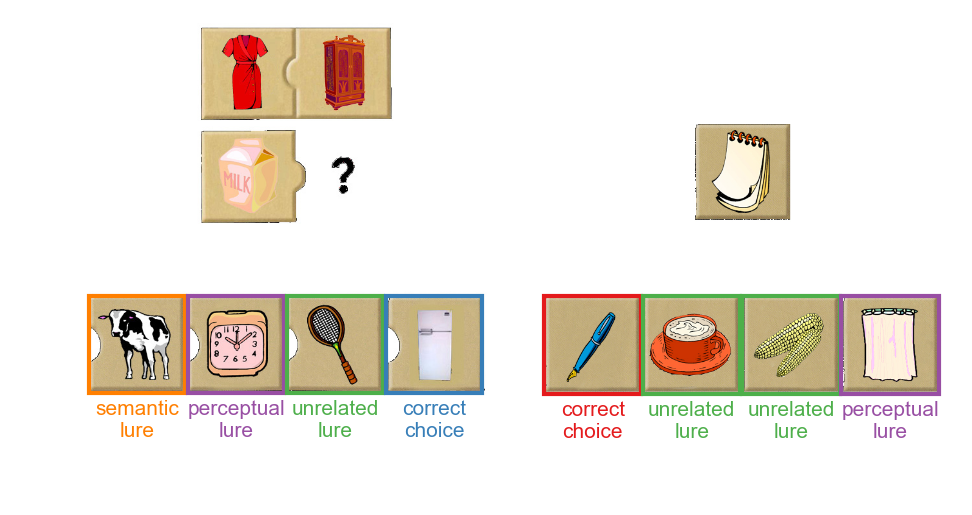

In [14]:
make_figure1(analogy_stimulus_file, semantic_stimulus_file)

## Figure 2

Accuracy improved with age (**a**), while response times decreased (**b**) for both semantic (red) and analogy (blue) trials. The number of errors on analogy trials decreased with age (**c**), and semantic lures (yellow) were more common than perceptual lures (purple), which were themselves more common than unrelated lures (green) across all ages (**c**). Lines for all plots represent 95% confidence intervals around predicted values using a quadratic model.

In [15]:
f_behav = '../DATA/WhitakerVendetti_BehavData.csv'
analysis_dir = '../'

In [16]:
def get_min_max(data):
    
    data_range = np.max(data) - np.min(data)
    data_min = np.min(data) - (data_range * 0.05)
    data_max = np.max(data) + (data_range * 0.05)
    
    return data_min, data_max

In [17]:
def add_line_to_legend(ax, color_list=['blue'], label_list=['Blue stars'], loc=0, rev=False):

    if rev:
        color_list = color_list[::-1]
        label_list = label_list[::-1]
        
    line_list = []
    for color, label in zip(color_list, label_list):
        line_list += [mlines.Line2D([], [], color=color, marker=None, label=label)]
    ax.legend(handles=line_list, loc=loc)

    return ax

In [18]:
def report_stats(y_name, df):
    
    formula = '{} ~ Age_scan'.format(y_name)
    mod = ols(formula=formula, data=df)
    res_lin = mod.fit()
    
    formula = '{} ~ Age_scan_sq + Age_scan'.format(y_name)
    mod = ols(formula=formula, data=df)
    res_quad = mod.fit()
    
    if 'R2' in y_name and not 'dis' in y_name and not 'sem' in y_name and not y_name.endswith('per'):
        formula = '{} ~ Age_scan_sq + Age_scan + {}'.format(y_name, y_name.replace('R2', 'R1'))
        mod = ols(formula=formula, data=df)
        res_corr = mod.fit()

    if 'R1' in y_name and not 'dis' in y_name and not 'sem' in y_name and not y_name.endswith('per'):
        formula = '{} ~ Age_scan_sq + Age_scan + {}'.format(y_name, y_name.replace('R1', 'R2'))
        mod = ols(formula=formula, data=df)
        res_corr = mod.fit()
        
    print ('====== {} ======='.format(y_name))
    print ('LINEAR')
    print ('Beta(Age) = {:2.4f}, P = {:2.4f}'.format(res_lin.params['Age_scan'], res_lin.pvalues['Age_scan']))
    print ('Rsq = {:2.3f}, Rsq_adj = {:2.3f}'.format(res_lin.rsquared, res_lin.rsquared_adj))
    print ('F({}, {}) = {:2.3f}, P = {:2.4f}'.format(res_lin.df_model, res_lin.df_resid, res_lin.fvalue, res_lin.f_pvalue))
    print ('QUADRATIC')
    print ('Beta(AgeSq) = {:2.4f}, P = {:2.4f}'.format(res_quad.params['Age_scan_sq'], res_quad.pvalues['Age_scan_sq']))
    print ('Beta(Age) = {:2.4f}, P = {:2.4f}'.format(res_quad.params['Age_scan'], res_quad.pvalues['Age_scan']))
    print ('Rsq = {:2.3f}, Rsq_adj = {:2.3f}'.format(res_quad.rsquared, res_quad.rsquared_adj))
    print ('F({}, {}) = {:2.3f}, P = {:2.4f}'.format(res_quad.df_model, res_quad.df_resid, res_quad.fvalue, res_quad.f_pvalue))
    if 'R2' in y_name and not 'dis' in y_name and not 'sem' in y_name and not y_name.endswith('per'):
        print ('QUADRATIC CORR')
        print ('Beta(R1) = {:2.4f}, P = {:2.4f}'.format(res_corr.params[y_name.replace('R2', 'R1')], 
                                                       res_corr.pvalues[y_name.replace('R2', 'R1')]))
        print ('Beta(AgeSq) = {:2.4f}, P = {:2.4f}'.format(res_corr.params['Age_scan_sq'], res_corr.pvalues['Age_scan_sq']))
        print ('Beta(Age) = {:2.4f}, P = {:2.4f}'.format(res_corr.params['Age_scan'], res_corr.pvalues['Age_scan']))
        print ('Rsq = {:2.3f}, Rsq_adj = {:2.3f}'.format(res_corr.rsquared, res_corr.rsquared_adj))
        print ('F({}, {}) = {:2.3f}, P = {:2.4f}'.format(res_corr.df_model, res_corr.df_resid, res_corr.fvalue, res_corr.f_pvalue))
    if 'R1' in y_name and not 'dis' in y_name and not 'sem' in y_name and not y_name.endswith('per'):
        print ('QUADRATIC CORR')
        print ('Beta(R2) = {:2.4f}, P = {:2.4f}'.format(res_corr.params[y_name.replace('R1', 'R2')], 
                                                       res_corr.pvalues[y_name.replace('R1', 'R2')]))
        print ('Beta(AgeSq) = {:2.4f}, P = {:2.4f}'.format(res_corr.params['Age_scan_sq'], res_corr.pvalues['Age_scan_sq']))
        print ('Beta(Age) = {:2.4f}, P = {:2.4f}'.format(res_corr.params['Age_scan'], res_corr.pvalues['Age_scan']))
        print ('Rsq = {:2.3f}, Rsq_adj = {:2.3f}'.format(res_corr.rsquared, res_corr.rsquared_adj))
        print ('F({}, {}) = {:2.3f}, P = {:2.4f}'.format(res_corr.df_model, res_corr.df_resid, res_corr.fvalue, res_corr.f_pvalue))
    

In [42]:
def make_figure2(f_behav):
    
    df = pd.read_csv(f_behav)
    
    df.loc[:, 'Age_scan_sq'] = df.loc[:,'Age_scan']**2
    
    # Print out the descriptive stats
    descriptive_stats(df)
    
    # Define the color list
    color_list = palettable.colorbrewer.get_map('Set1', 'qualitative', 5).mpl_colors
    
    colors_dict = { 'R1_percent_acc' : color_list[0],
                    'R2_percent_acc' : color_list[1],
                    'R1_meanRTcorr_cor' : color_list[0],
                    'R2_meanRTcorr_cor' : color_list[1],
                    'R2_percent_dis' : color_list[2],
                    'R2_percent_per' : color_list[3],
                    'R2_percent_sem' : color_list[4] }
    
    f_name = os.path.join(analysis_dir, 
                          'FIGURES',
                          'Figure2.png')
    
    fig, ax_list = plt.subplots(1,3, figsize=(16,4.5))

    ax_list = ax_list.reshape(-1)

    x_label_dict = { 'Age_scan' : 'Age (years)' }
    y_label_dict = { 0 : 'Accuracy (% resp)',
                     1 : 'Reaction time (s)',
                     2 : 'Analogy error rate (% resp)' }
    y_measures_dict = { 0 : ['R1_percent_acc', 'R2_percent_acc'],
                        1 : ['R1_meanRTcorr_cor', 'R2_meanRTcorr_cor'],
                        2 : ['R2_percent_dis', 'R2_percent_per', 'R2_percent_sem']}
    y_measures_label_dict = { 'R1_percent_acc' : 'Semantic',
                              'R2_percent_acc' : 'Analogy',
                              'R1_meanRTcorr_cor' : 'Semantic',
                              'R2_meanRTcorr_cor' : 'Analogy',
                              'R2_percent_dis' : 'Unrelated',
                              'R2_percent_per' : 'Perceptual',
                              'R2_percent_sem' : 'Semantic' }
    legend_loc_dict = { 0 : 4,
                        1 : 1,
                        2 : 1 }
    legend_rev_dict = { 0 : False,
                        1 : False,
                        2 : True }
    
    for i, ax in enumerate(ax_list):
        
        x_name = 'Age_scan'
        y_name_list = y_measures_dict[i]
        
        colors_list = []
        labels_list = []
        
        for y_name in y_name_list:
            sns.regplot(x_name, y_name, data=df, 
                        ax=ax, 
                        color=colors_dict[y_name], 
                        order=2)
            colors_list += [colors_dict[y_name]]
            labels_list += [y_measures_label_dict[y_name]]
            
            report_stats(y_name, df)
            
        ax.locator_params(nbins=6, axis='y')
        ax.set_xticks([6, 10, 14, 18])
        
        ax.set_xlim(get_min_max(df[x_name]))
        ax.set_ylim(get_min_max(df[y_name]))
        ax.set_xlabel(x_label_dict[x_name])
        ax.set_ylabel(y_label_dict[i])
        
        add_line_to_legend(ax, 
                           color_list=colors_list,
                           label_list=labels_list,
                           loc=legend_loc_dict[i],
                           rev=legend_rev_dict[i])
        
    sns.despine()
        
    # Add in panel labels
    ax_list = add_panel_labels_fig2(ax_list)    
    
    # Tight layout
    plt.tight_layout()
    
    # Save the figure
    fig.savefig(f_name, dpi=600, bbox_inches=0)
    
    plt.show()

In [43]:
def add_panel_labels_fig2(ax_list):
    
    x_list = [ -0.175, -0.115, -0.145 ]
    y = 1.0
    color='k'
    fontsize=18
    
    letters = string.ascii_lowercase
    for i, ax in enumerate(ax_list):
        
        ax.text(x_list[i], y, 
                '({})'.format(letters[i]), 
                fontsize=fontsize, 
                transform=ax.transAxes, 
                color=color,
                horizontalalignment='center',
                verticalalignment='center',
                fontname='arial',
                fontweight='bold'
        )
        
    return ax_list


In [46]:
def descriptive_stats(df):
    
    for measure in ['R1_percent_acc', 'R2_percent_acc',
                    'R1_meanRTcorr_cor', 'R2_meanRTcorr_cor',
                    'R2_percent_sem', 'R2_percent_per', 'R2_percent_dis']:
        print('{}: N = {:2.0f}, M = {:2.3f}, SD = {:2.3f}'.format(measure, df[measure].notnull().count(), df[measure].mean(), df[measure].std()))
    
        if 'R2' in measure and not 'dis' in measure and not 'sem' in measure and not measure.endswith('per'):
            measure_diff = measure.replace('R2', 'R2_sub_R1')
            df[measure_diff] = df[measure] - df[measure.replace('R2', 'R1')]
            print('{}: M = {:2.3f}, SD = {:2.3f}'.format(measure_diff, df[measure_diff].mean(), df[measure_diff].std()))
            print('    N R2 gt R1 = {}, N R2 lt R1 = {}, N same = {}'.format(np.sum(df[measure_diff]>0), 
                                                                         np.sum(df[measure_diff]<0),
                                                                         np.sum(df[measure_diff]==0)))
            
        if 'R1' in measure:
            t, p = ttest_rel(df[measure], df[measure.replace('R1', 'R2')])
            print('   R1 vs R2 (paired): t({:2.0f}) = {:2.3f}, p = {:2.3f}'.format(df[measure].count()-1, t, p))

        if 'sem' in measure:
            t, p = ttest_rel(df['R2_percent_sem'], df['R2_percent_per'])
            print('   sem vs per (paired): t({:2.0f}) = {:2.3f}, p = {:2.3f}'.format(df['R2_percent_per'].count()-1, t, p))
        if 'dis' in measure:
            t, p = ttest_rel(df['R2_percent_per'], df['R2_percent_dis'])
            print('   per vs dis (paired): t({:2.0f}) = {:2.3f}, p = {:2.3f}'.format(df['R2_percent_per'].count()-1, t, p))

R1_percent_acc: N = 138, M = 89.384, SD = 12.515
   R1 vs R2 (paired): t(137) = 15.080, p = 0.000
R2_percent_acc: N = 138, M = 74.949, SD = 18.961
R2_sub_R1_percent_acc: M = -14.435, SD = 11.244
    N R2 gt R1 = 5, N R2 lt R1 = 126, N same = 7
R1_meanRTcorr_cor: N = 138, M = 3.598, SD = 0.993
   R1 vs R2 (paired): t(137) = -23.715, p = 0.000
R2_meanRTcorr_cor: N = 138, M = 4.668, SD = 1.005
R2_sub_R1_meanRTcorr_cor: M = 1.069, SD = 0.530
    N R2 gt R1 = 134, N R2 lt R1 = 4, N same = 0
R2_percent_sem: N = 138, M = 12.239, SD = 9.624
   sem vs per (paired): t(137) = 10.641, p = 0.000
R2_percent_per: N = 138, M = 5.068, SD = 4.833
R2_percent_dis: N = 138, M = 2.810, SD = 3.486
   per vs dis (paired): t(137) = 5.420, p = 0.000
====== R1_percent_acc =======
LINEAR
Beta(Age) = 1.9672, P = 0.0000
Rsq = 0.328, Rsq_adj = 0.323
F(1.0, 136.0) = 66.339, P = 0.0000
QUADRATIC
Beta(AgeSq) = -0.3356, P = 0.0000
Beta(Age) = 9.9928, P = 0.0000
Rsq = 0.439, Rsq_adj = 0.431
F(2.0, 135.0) = 52.903, P = 0.

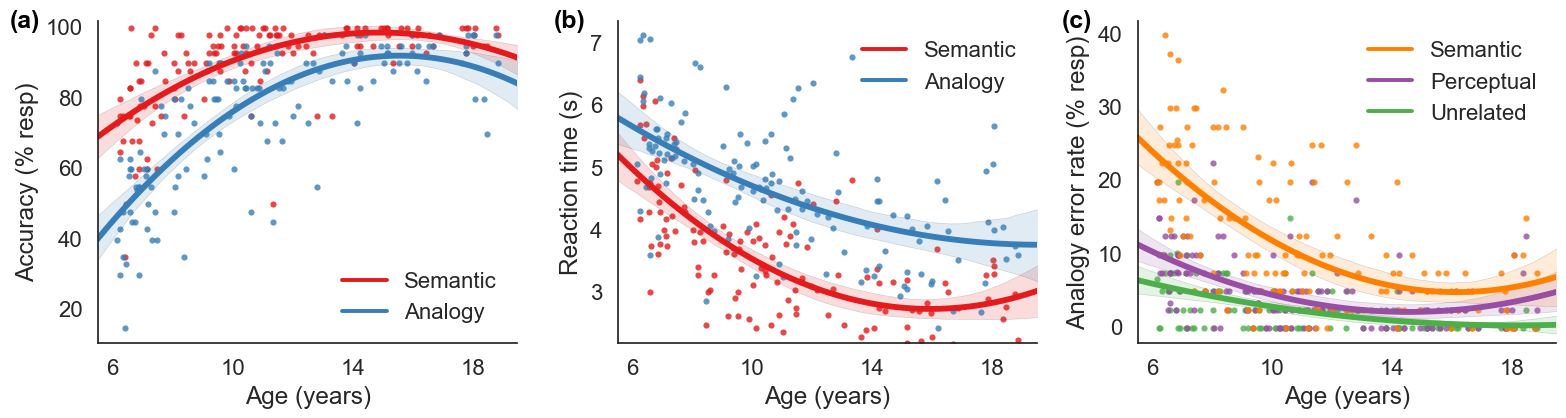

In [47]:
pd.options.mode.chained_assignment = None  # default='warn'
# I can't find which line is triggering this error so I've just turned off the warning. Bad Kirstie.

make_figure2(f_behav)


## Figure 3

Whole-brain activation patterns on average across all participants for the contrasts of semantic greater than fixation (yellow), analogy greater than fixation (red), and analogy greater than semantic (blue). Overlapping regions are shown in orange, green, purple and pink according to the Venn diagram, and all results are constrained to be within
regions liberally activated by the semantic or analogy tasks. Statistical tests are permutation tests, and thresholds are set using a cluster defining threshold of Z > 2.3 and are family-wise error-corrected at p < .05. Thresholded and unthresholded maps are available in NeuroVault at http://neurovault.org/collections/1658.

In [475]:
def make_figure3(mean_results_surface_file, venn_file):
    
    fig, ax = plt.subplots(figsize=(6,4.5))
    
    # Add in the brains
    img_brains = read_in_brains(mean_results_surface_file)
    
    ax.imshow(img_brains)

    # Turn off the axes
    ax.set_axis_off()
    
    # Overlay the venn diagram
    ax_venn = fig.add_axes([0.25, 0.21, 0.5, 0.5]) # inset axes
    img_venn = read_in_venn(venn_file)
    
    ax_venn.imshow(img_venn)
        
    # Turn off the axes
    ax_venn.set_axis_off()

    # Tighten up the layout
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                        wspace=0, hspace=0)

    fig.savefig('../FIGURES/Figure3.png', dpi=600, bbox_inches=0)

In [58]:
mean_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Mean_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'
corrage_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Corr_Age_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'
corracc_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Corr_R2acc_Age_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'
venn_file = '../EXAMPLE_STIMULI/VennDiagram.png'

f_mri_cope1 = '../EXTRACTED_TIMESERIES/ALL_N95_Corr_R2acc_Age_cope1_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE1.txt'
f_mri_cope2 = '../EXTRACTED_TIMESERIES/ALL_N95_Corr_R2acc_Age_cope1_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE2.txt'


In [753]:
def read_in_brains(results_surface_file):
    
    img = mpimg.imread(results_surface_file)
    
    img = img[21:-120, 44:-44, :]

    return img

In [754]:
def read_in_venn(venn_file):
    
    img = mpimg.imread(venn_file)
        
    return img

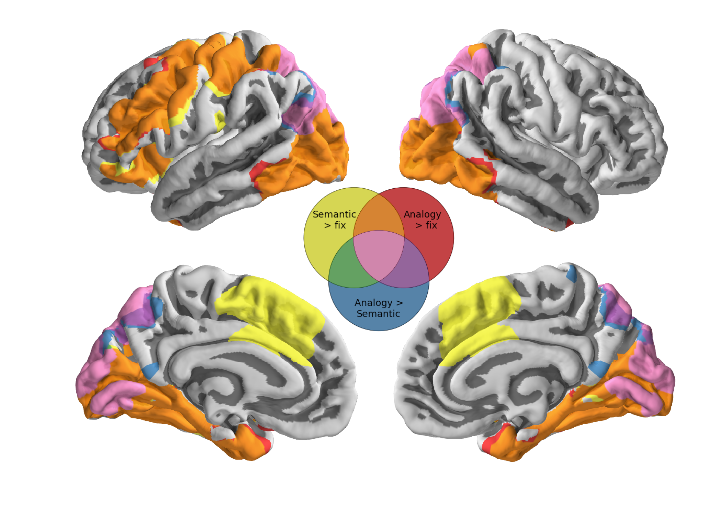

In [755]:
make_figure3(mean_results_surface_file, venn_file)

In [759]:
def make_figure4(corrage_results_surface_file, venn_file):
    
    fig, ax = plt.subplots(figsize=(6,4.5))
    
    # Add in the brains
    img_brains = read_in_brains(corrage_results_surface_file)
    
    ax.imshow(img_brains)

    # Turn off the axes
    ax.set_axis_off()
    
    # Overlay the venn diagram
    ax_venn = fig.add_axes([0.25, 0.21, 0.5, 0.5]) # Add in a new axis
    img_venn = read_in_venn(venn_file)
    
    ax_venn.imshow(img_venn)
        
    # Turn off the axes
    ax_venn.set_axis_off()

    # Tighten up the layout
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                        wspace=0, hspace=0)

    fig.savefig('../FIGURES/Figure4.png', dpi=600, bbox_inches=0)

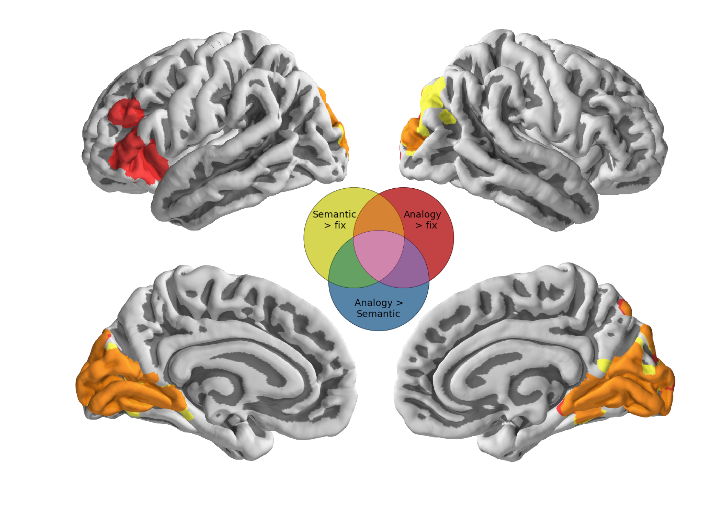

In [760]:
make_figure4(corrage_results_surface_file, venn_file)

## Figure 5
Whole-brain analysis showing regions that demonstrate an increase in activation with accuracy on analogy trials across all participants after correcting for the effects of age. Only the contrast of semantic greater than fixation (shown in yellow) showed a significant correlation in left aLIPC (a). Panel b illustrates how activation in this region correlates with (i) age and (ii) accuracy on analogy trails after correcting for the effects of age. Very similar patterns are shown when activation on analogy trials are extracted from this region (c). All results are constrained to be within regions liberally activated on average by the semantic or analogy tasks. No regions in the right hemisphere or the medial aspect of the left hemisphere passed the threshold for significance. Statistical tests are permutation tests, thresholds are set using a cluster defining threshold of Z > 2.3 and are family-wise error-corrected at p < .05. Thresholded and unthresholded maps are available in NeuroVault at http://neurovault.org/collections/1658.

In [53]:
def read_in_leftlatbrain(results_surface_file):
    
    img = mpimg.imread(results_surface_file)
    
    print(img.shape)
    img = img[25:-665, 35:-785, :]
    print(img.shape)

    return img

In [54]:
def make_figure5(corracc_results_surface_file, f_behav, f_mri_cope1, f_mri_cope2):
    
    fig, ax_list = plt.subplots(2,2, figsize=(14,7.5))

    # Add in left lateral brain
    ax_brain = fig.add_axes([-0.01, 0.2, 0.36, 0.6]) # Add in the brain axis
    
    img_brain = read_in_leftlatbrain(corracc_results_surface_file)
    
    ax_brain.imshow(img_brain)

    # Add the dashed circle
    ax_brain = add_circle(ax_brain)
    
    # Turn off the axes
    ax_brain.set_axis_off()

    # Shift these subplots over to the right
    # to make space for the brain
    fig.subplots_adjust(left=0.42, right=0.99, bottom=0.1, top=0.97, wspace=0.3)
    
    # Add in the scatter plots
    ax_list = figure5_scatterplots(f_behav, f_mri_cope1, f_mri_cope2, ax_list, cluster=1, show_r_p=False)
    
    # Add in the labels
    ax_brain, ax_list = add_panel_labels_fig5(ax_brain, ax_list)
    
    # Save the figure
    fig.savefig('../FIGURES/Figure5.png', dpi=600, bbox_inches=0)

In [55]:
def add_circle(ax):
    
    circle = plt.Circle((150, 350), 90,
                        linestyle='dashed',
                        fill=False,
                        edgecolor='k',
                        linewidth=4)
    ax.add_artist(circle)
    
    return ax

In [56]:
def add_panel_labels_fig5(ax_brain, ax_list):
    
    # First the letters
    letter_ax_list = [ax_brain, ax_list[0], ax_list[2]]
    x_list = [ 0.1, -0.24, -0.24 ]
    y_list = [ 0.95, 1.0, 1.0 ]
    color='k'
    fontsize=18
    
    letters = string.ascii_lowercase
    for i, ax in enumerate(letter_ax_list):
        
        ax.text(x_list[i], y_list[i], 
                '({})'.format(letters[i]), 
                fontsize=fontsize, 
                transform=ax.transAxes, 
                color=color,
                horizontalalignment='center',
                verticalalignment='center',
                fontname='arial',
                fontweight='bold'
        )

    # Then the lowercase roman numerals
    color='k'
    fontsize=18
    
    numerals = [ 'i', 'ii', 'i', 'ii' ]
    
    for i, ax in enumerate(ax_list):
        
        ax.text(0.02, 0.95, 
                '{}'.format(numerals[i]), 
                fontsize=fontsize, 
                transform=ax.transAxes, 
                color=color,
                horizontalalignment='left',
                verticalalignment='center',
                fontname='arial',
                fontweight='bold'
        )
    return ax_brain, ax_list


(1200, 1500, 4)
(510, 680, 4)
R1_percent_acc: N = 95, M = 92.158, SD = 9.916
   R1 vs R2 (paired): t(94) = 12.365, p = 0.000
R2_percent_acc: N = 95, M = 78.537, SD = 16.512
R2_sub_R1_percent_acc: M = -13.621, SD = 10.737
    N R2 gt R1 = 2, N R2 lt R1 = 87, N same = 6
R1_meanRTcorr_cor: N = 95, M = 3.375, SD = 0.925
   R1 vs R2 (paired): t(94) = -25.132, p = 0.000
R2_meanRTcorr_cor: N = 95, M = 4.469, SD = 0.976
R2_sub_R1_meanRTcorr_cor: M = 1.094, SD = 0.424
    N R2 gt R1 = 93, N R2 lt R1 = 2, N same = 0
R2_percent_sem: N = 95, M = 11.263, SD = 9.501
   sem vs per (paired): t(94) = 8.207, p = 0.000
R2_percent_per: N = 95, M = 4.789, SD = 4.888
R2_percent_dis: N = 95, M = 2.342, SD = 2.958
   per vs dis (paired): t(94) = 5.221, p = 0.000


C:\Program Files\Anaconda3\envs\kwturing\lib\site-packages\pandas\io\parsers.py:1961: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Program Files\Anaconda3\envs\kwturing\lib\site-packages\pandas\io\parsers.py:1963: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


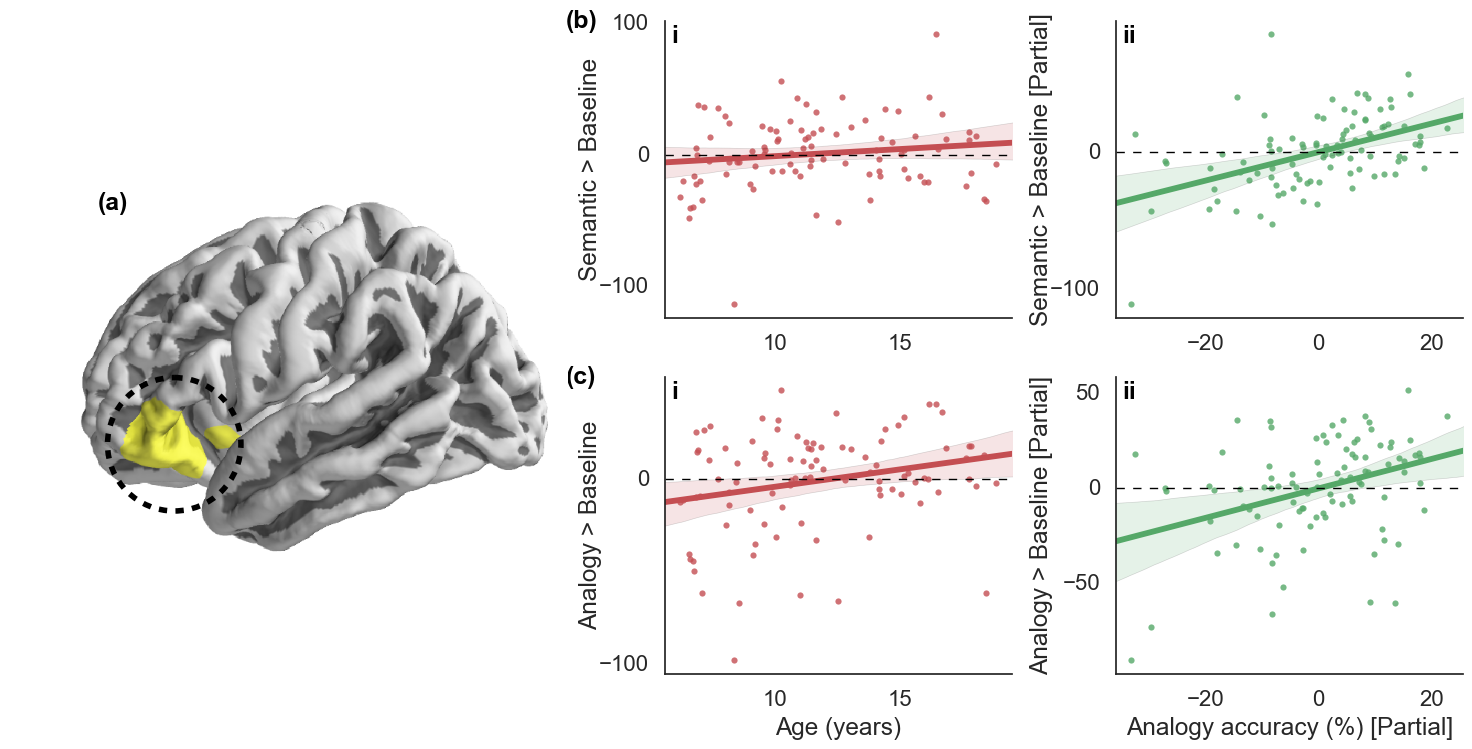

In [59]:
make_figure5(corracc_results_surface_file, f_behav, f_mri_cope1, f_mri_cope2)

In [48]:
def figure5_scatterplots(f_behav, f_mri_cope1, f_mri_cope2, ax_list, cluster=1, show_r_p=True):
    '''
    Create a 2x2 grid of scatter plots.
    
    [0,0] - sem > baseline vs age
    [0,1] - sem > baseline vs R2_accuracy PARTIAL
    [0,1] - ana > baseline vs age
    [1,1] - ana > baseline vs R2_accuracy PARTIAL
    
    '''
    df_cope1 = read_in_data(f_behav, f_mri_cope1)
    df_cope2 = read_in_data(f_behav, f_mri_cope2)

    descriptive_stats(df_cope1)
    
    
    colors_dict = { 'Age_scan' : sns.color_palette()[2],
                    'R2_percent_acc' : sns.color_palette()[1] }
    
    ax_list = ax_list.reshape(-1)

    x_name_list = [ 'Age_scan', 'R2_percent_acc' ]
    x_label_dict = { 'Age_scan' : 'Age (years)',
                     'Age_scan_res' : 'Age (years) [Partial]',
                     'R2_percent_acc' : 'Analogy accuracy (%)',
                     'R2_percent_acc_res' : 'Analogy accuracy (%) [Partial]',
                     'R2_percent_sem' : 'Semantic errors (%)',
                     'R2_Correct_dividedby_Semantic' : 'Accuracy / Semantic Err' }
    y_label_dict = { 0 : 'Semantic > Baseline',
                     1 : 'Analogy > Baseline' }
    
    df_dict = { 0 : df_cope1,
                1 : df_cope2 }
    
    for i, ax in enumerate(ax_list[::2]):
        
        x_name = 'Age_scan'
        y_name = 'cluster_{}'.format(cluster)
        
        df = df_dict[i]
        
        sns.regplot(x_name, y_name, data=df, ax=ax, color=colors_dict[x_name])
        
        ax.locator_params(nbins=4)
        
        ax.set_xlim(get_min_max(df[x_name]))
        ax.set_ylim(get_min_max(df[y_name]))
        ax.set_xlabel(x_label_dict[x_name])
        ax.set_ylabel(y_label_dict[i])
        
        r, p = pearsonr(df[x_name], df[y_name])
        r, p = format_r_p(r, p)
        
        ax.axhline(0, color='k', linestyle='dashed', linewidth=1)
        
        if show_r_p:
            ax.text(0.05, 0.95, 
                    'r {}\np {}'.format(r, p),
                    transform=ax.transAxes,
                    horizontalalignment='left',
                    verticalalignment='top',
                    size='large')
        
        if i == 0:
            ax.set_xlabel('')
        ax.yaxis.set_label_coords(-0.18, 0.5)

    for i, ax in enumerate(ax_list[1::2]):
        
        x_name = 'R2_percent_acc'
        y_name = 'cluster_{}'.format(cluster)
        covar_name = 'Age_scan'
        
        df = df_dict[i]
        
        x_res = residuals(df[covar_name], df[x_name])
        y_res = residuals(df[covar_name], df[y_name])
        
        df['{}_res'.format(x_name)] = x_res
        df['{}_res'.format(y_name)] = y_res
        
        sns.regplot('{}_res'.format(x_name),
                    '{}_res'.format(y_name),
                    data=df,
                    ax=ax,
                    color=colors_dict[x_name])
        
        ax.locator_params(nbins=4)
        
        ax.set_xlim(get_min_max(df['{}_res'.format(x_name)]))
        ax.set_ylim(get_min_max(df['{}_res'.format(y_name)]))
        ax.set_xlabel('{} [Partial]'.format(x_label_dict[x_name]))
        ax.set_ylabel('{} [Partial]'.format(y_label_dict[i]))
        
        r, p = pearsonr(df['{}_res'.format(x_name)], df['{}_res'.format(y_name)])
        r, p = format_r_p(r, p)
        
        ax.axhline(0, color='k', linestyle='dashed', linewidth=1)
        
        if show_r_p:
            ax.text(0.05, 0.95, 
                    'r {}\np {}'.format(r, p),
                    transform=ax.transAxes,
                    horizontalalignment='left',
                    verticalalignment='top',
                    size='large')

        if i == 0:
            ax.set_xlabel('')
        
        ax.yaxis.set_label_coords(-0.18, 0.5)
        
    sns.despine()
    
    return ax_list


In [49]:
def read_in_data(f_behav, f_mri):
    behav_df = pd.read_csv(f_behav)

    mri_df = pd.read_csv(f_mri, sep=r"\s*", engine='python')
    mri_df['subid_long'] = mri_df['sub_id']
    
    df = behav_df.merge(mri_df, on='subid_long')
    
    return df

In [50]:
def format_r_p(r, p):
    
    r = '{:2.2f}'.format(r)
    r = '= {}'.format(r)
    
    if p < 0.001:
        p = '< .001'
    else:
        p = '{:2.3f}'.format(p)
        p = '= {}'.format(p[1:])
    
    return r, p

In [51]:
def residuals(x, y):
    '''
    A useful little function that correlates
    x and y together to give their residual
    values. These can then be used to calculate
    partial correlation values
    '''
    import numpy as np
    
    if len(x.shape) == 1:
        x = x[np.newaxis, :]
    A = np.vstack([x, np.ones(x.shape[-1])]).T
    B = np.linalg.lstsq(A, y)[0]
    m = B[:-1]
    c = B[-1]
    pre = np.sum(m * x.T, axis=1) + c
    res = y - pre
    return res